<a href="https://colab.research.google.com/github/cagBRT/computer-vision/blob/master/opencv10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

edge detection embodies math- ematical methods to find points in an image where the brightness of pixel intensities changes distinctly

The first thing we are going to do is find the “gradient” of the grayscale image, allowing us to find edge-like regions in the x and y direction.

then apply Canny edge detection, a multi-stage pro- cess of noise reduction (blurring), finding the gradient of the image (utilizing the Sobel kernel in both the horizon- tal and vertical direction), non-maximum suppression, and hysteresis thresholding.

In [1]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

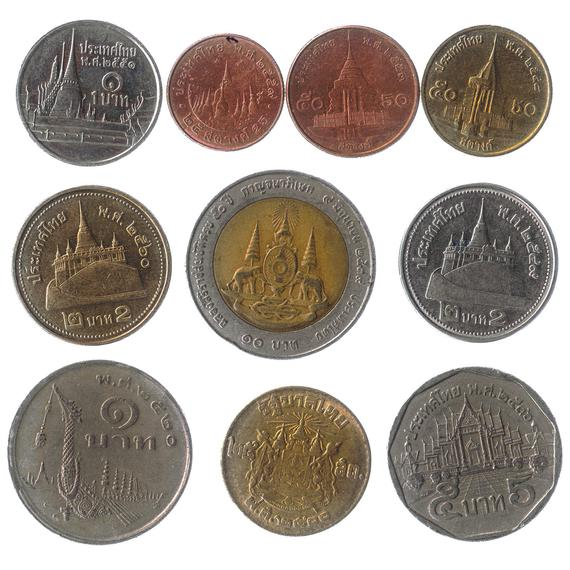

In [4]:
image = cv2.imread("thaiCoins.jpg")
cv2_imshow( image)

When computing gradients and edges, we (normally) compute them on a single chan- nel – in this case, we are using the grayscale image; how- ever, we can also compute gradients for each channel of the RGB image. For the sake of simplicity, let’s stick with the grayscale image since that is what you will use in most cases.

use the Laplacian method to compute the gradient magnitude image by calling the cv2.Laplacian function. The first argument is our grayscale image – the image we want to compute the gradient magnitude repre- sentation for. The second argument is our data type for the output image.

we have mainly used 8-bit un- signed integers. Why are we using a 64-bit float now?
The reason involves the transition of black-to-white and white-to-black in the image.
Transitioning from black-to-white is considered a posi- tive slope, whereas a transition from white-to-black is a negative slope. If you remember our discussion of image arithmetic in Chapter 6, you’ll know that an 8-bit unsigned integer does not represent negative values. Either it will be clipped to zero if you are using OpenCV or a modulus operation will be performed using NumPy.

The short answer here is that if you don’t use a floating point data type when computing the gradient magnitude image, you will miss edges, specifically the white-to-black transitions.

**In order to ensure you catch all edges**, use a floating point data type, then take the absolute value of the gradient image and convert it back to an 8-bit unsigned integer. This is definitely an important technique to take note of – otherwise you’ll be missing edges in your image!


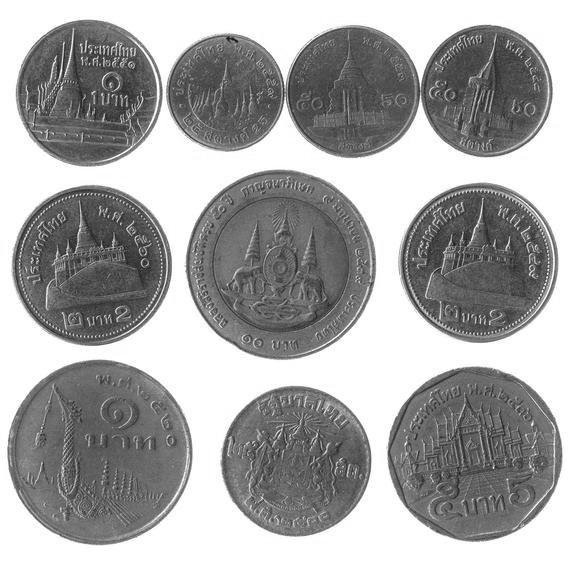

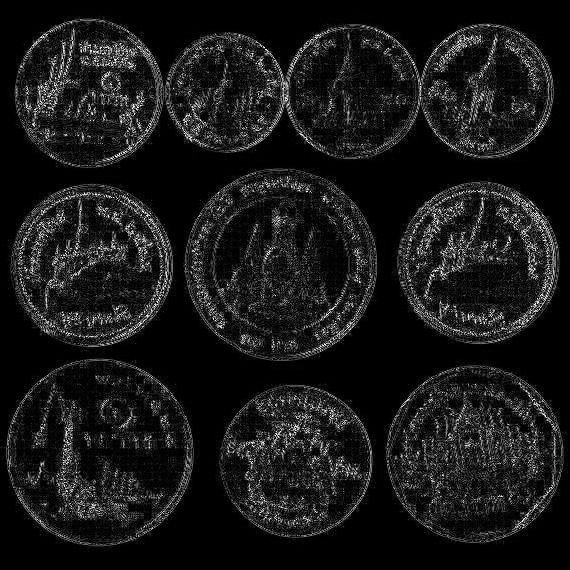

In [9]:
image = cv2.imread("thaiCoins.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow( image)
print("\n")
lap = cv2.Laplacian(image, cv2.CV_64F)
lap = np.uint8(np.absolute(lap))
cv2_imshow( lap)

Using the Sobel operator, we can compute gradient mag-
nitude representations along the x and y axis, allowing us to find both horizontal and vertical edge-like regions.

One thing you’ll notice is that the edges are very “noisy”. They are not clean and crisp. We’ll remedy that by using the Canny edge detector in the next section.

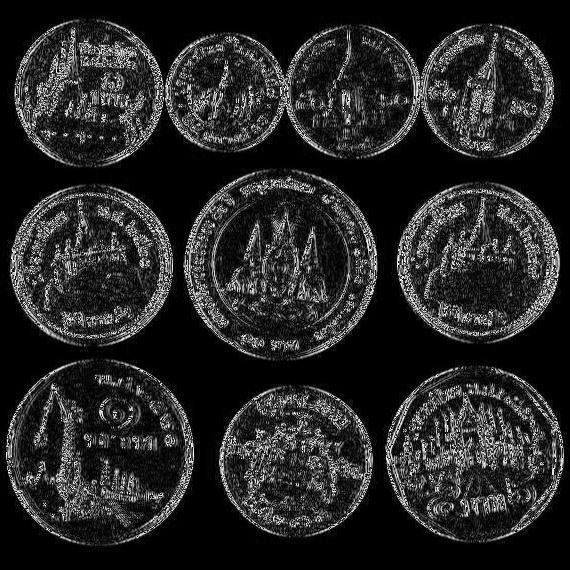

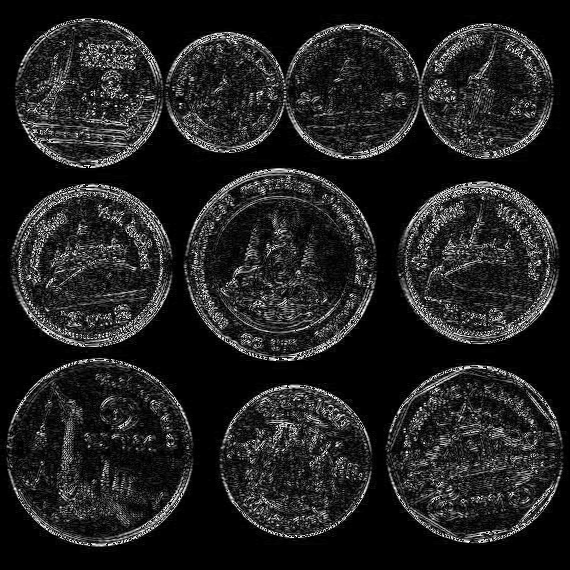

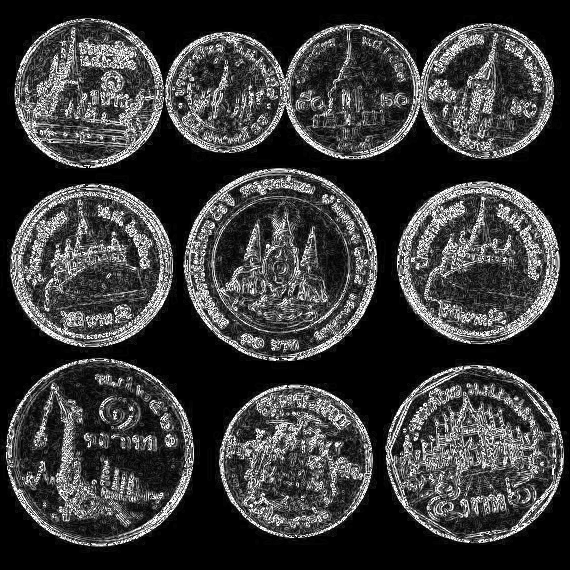

In [10]:
sobelX = cv2.Sobel(image, cv2.CV_64F, 1, 0)
sobelY = cv2.Sobel(image, cv2.CV_64F, 0, 1)

sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))
sobelCombined = cv2.bitwise_or(sobelX, sobelY) 
cv2_imshow( sobelX)
print("\n")
cv2_imshow(sobelY)
print("\n")
cv2_imshow(sobelCombined)

The Canny edge detector is a multi-step process. It involves blurring the image to remove noise, computing Sobel gradi- ent images in the x and y direction, suppressing edges, and finally a hysteresis thresholding stage that determines if a pixel is “edge-like” or not.

Any gradient value larger than threshold2 is considered to be an edge. Any value below threshold1 is consid- ered not to be an edge. Values in between threshold1 and threshold2 are either classified as edges or non-edges
based on how their intensities are “connected”. In this case, any gradient values below 30 are considered non-edges wh- ereas any values above 150 are considered edges.

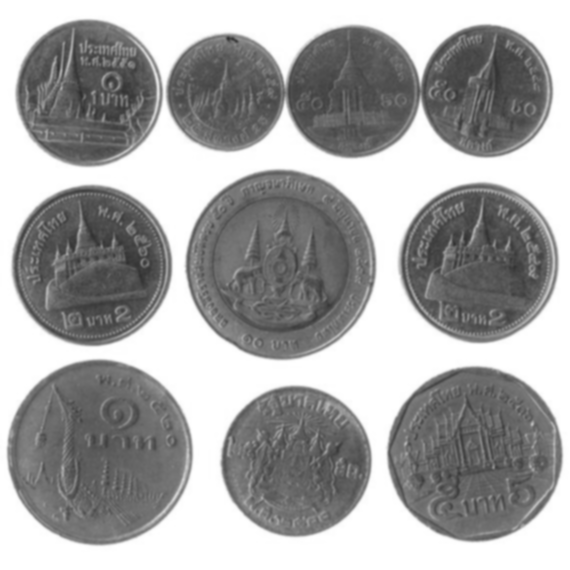

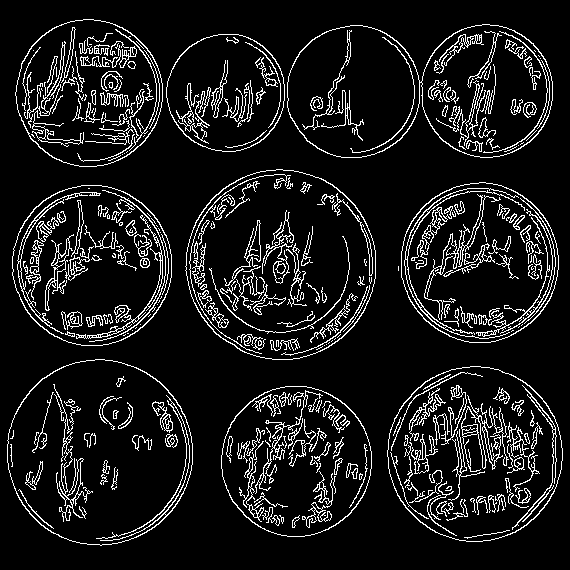

In [12]:
image = cv2.imread("thaiCoins.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.GaussianBlur(image, (5, 5), 0)
cv2_imshow(image)

canny = cv2.Canny(image, 30, 150)
cv2_imshow( canny)